# $\Phi$-SO demo : Optimizing constants with auto-differentiation & LBFGS

This notebook is for anyone who simply wants to use `physo`’s free constant optimization scheme - without necessarily diving into symbolic optimization or machine learning. It contains a simple example of how to optimize constants in a function using PyTorch's auto-differentiation and LBFGS optimizer.

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [51]:
import physo.physym.free_const as fc

Fixing seed

In [52]:
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

### Problem definition

Your function should be written as an auto-differentiable PyTorch function only using PyTorch operations so gradients can be computed automatically.

In [53]:
def my_func(params, x):
    a, b, c = params
    return a * torch.sin(b * x + c)

Making some synthetic target data

In [54]:
x = torch.linspace(0, 2*np.pi, 50)
y_target = 2.5 * torch.sin(1.2*x + 0.5)
y_target = y_target + 0.2*torch.randn(y_target.shape)  # Adding some noise

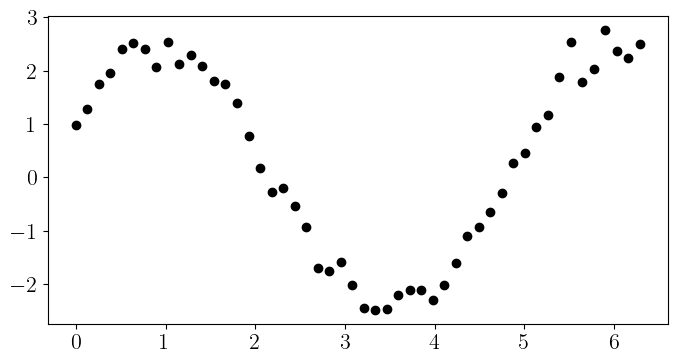

In [55]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
ax.plot(x, y_target, 'ko', label='Target data')

### Optimizer hyperparameters

In [56]:
optimizer_args = {
    'n_steps' : 30,    # Number of optimization steps
    'tol'     : 1e-10, # Error tolerance, early stops if error < tol
    'lbfgs_func_args' : {
        'max_iter'       : 20,             # Maximal number of iterations per optimization step
        'line_search_fn' : "strong_wolfe", # Maximal number of function evaluations per optimization step
                         },
}

### Optimizing constants

Defining a function to optimize that only depends on the free constants and the target data.

In [57]:
def my_loss(params):
    # Compute the model output
    y_pred = my_func(params, x)
    # Compute the loss (mean squared error)
    loss = torch.mean((y_pred - y_target)**2)
    return loss

Parameters to optimize should be defined as a PyTorch tensor with `requires_grad=True` or a list of such tensors.

In [58]:
# Initial guess for the parameters
params = torch.tensor([1., 1., 1.], requires_grad=True)

### Optimization process

In [59]:
history = fc.LBFGS_optimizer(params = params,
                               f = my_loss,
                               **optimizer_args,
                   )

### Results

Loss history

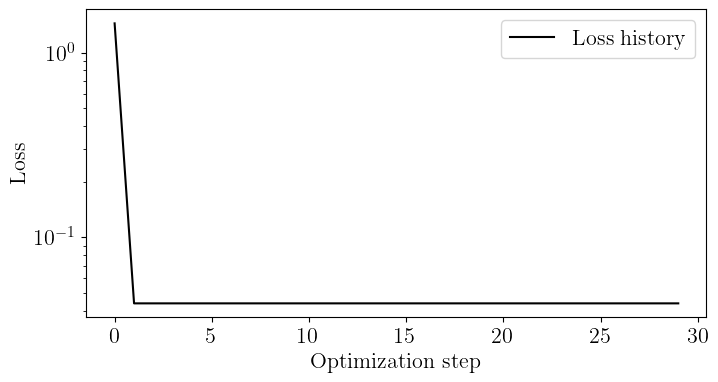

In [64]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
ax.plot(history, 'k-', label='Loss history')
ax.set_yscale('log')
ax.set_xlabel('Optimization step')
ax.set_ylabel('Loss')
ax.legend()


Parameters found

In [65]:
print(params)

tensor([2.4602, 1.2148, 0.4580], requires_grad=True)


Fit results

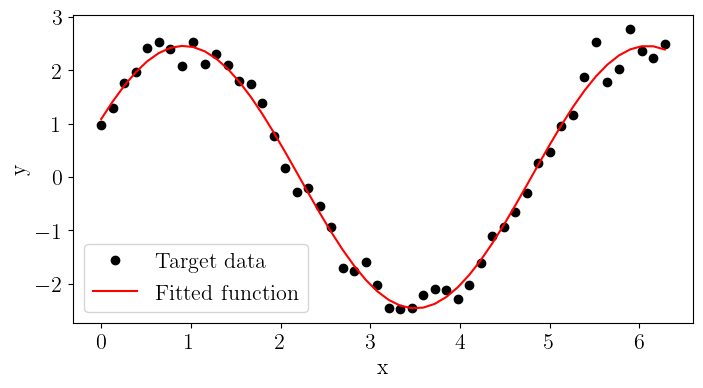

In [66]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
y_pred = my_func(params, x)
ax.plot(x, y_target, 'ko', label='Target data')
ax.plot(x, y_pred.detach(), 'r-', label='Fitted function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()